<a href="https://colab.research.google.com/github/DiegoCabreraOsorio/tareas-data-science/blob/main/TrabajoFinal_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo final - Data Science para Ingeniería Matemática

Integrantes: Diego Cabrera, Rafael Hernández y Felipe González

El siguiente trabajo tiene por objetivo trabajar el dataset de "[Salary Prediction](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor/data)", y predecir el salario promedio ('avg_salary') en función de las demás variables. Para ello se utilizarán los modelos de aprendizaje supervisado y no-supervisado.

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/jobs-dataset-from-glassdoor")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/jobs-dataset-from-glassdoor


In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv(path + "/eda_data.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


De este modo, tenemos un buena variable "X" y un buena variable "y" para trabajar y comenzar a construir nuestros modelos:

## EDA, Limpieza y preprocesamiento

In [18]:
import pandas as pd
import numpy as np

In [19]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


Notamos de inmmediato que la edad tiene un mínimo de -1 años y un máximo de 276, lo cual pueden deberse a errores de toma de muestras. Para esto, reemplazaremos los valores que se encuentren por debajo de los 18 años y por sobre los 60 años por la media de la edad (esto pues a los 18 años -en genera- se entra al mundo laboral, y a partir de los 60 años comienza la jubilación).

Realizaremos algo similar con la variable 'Founded', pues no tiene sentido que una empresa se halla construído en el año -1. Para ello, imputaremos toda empresa construída por debajo de 1936 con la mediana, pues en aquel año Turing formaliza conceptos clave para sentar las bases de la computadora actual:

In [20]:
mediana_age = df['age'].median()
df.loc[(df['age'] < 18) | (df['age'] > 60), 'age'] = mediana_age

,age
count,742.000000
mean,28.035040
std,9.314355
min,18.000000
25%,24.000000
50%,24.000000
75%,24.000000
max,59.000000


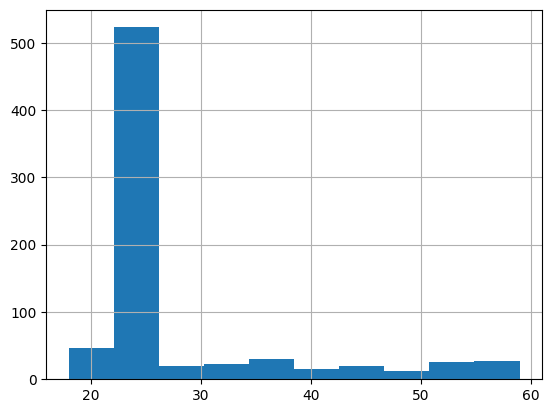

In [21]:
df['age'].hist()
df['age'].describe()

Ahora esta información logra tener sentido, debido a que mantiene un gran foco de "jóvenes" trabajando en áreas de la tecnología. Al mismo tiempo que gente de todas las edades también. Ahora procedemos a trabajar con la variable 'Founded'

In [22]:
mediana_Founded = df['Founded'].median()
df.loc[(df['Founded'] < 1936), 'Founded'] = mediana_Founded

In [23]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1991.466307,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,28.035040,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,17.689962,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,9.314355,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,1937.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1987.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


Note que no estudiamos en demasía todas las variables. En particular, algunas no aportan información o bien, están simplificadas en alguna otra columna. Ante esto, se eliminarán más adelante.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

De aquí, observamos que no existen variables nulas, por lo tanto no es necesario realizar algún otro proceso al respecto.

Ahora, realizaremos un análisis de las variables, para verificar su relevancia y en caso que esten duplicadas.

In [25]:
df.drop(columns = ['Unnamed: 0','Salary Estimate','Company Name','Headquarters','Job Description','Competitors','desc_len','same_state'], inplace = True)

Ahora, haremos una diferencia entre variables numéricas y no numéricas:

In [26]:
vars_object = df.select_dtypes(['object']).columns
vars_num = df.select_dtypes(['int64','float64']).columns

In [27]:
print(vars_object)
print(vars_num)

Index(['Job Title', 'Location', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'company_txt', 'job_state', 'job_simp',
       'seniority'],
      dtype='object')
Index(['Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'num_comp'],
      dtype='object')


Observaremos los tipos de trabajos:

In [28]:
import seaborn as sns
import matplotlib as plt

Text(0.5, 1.0, 'Tipos de trabajos')

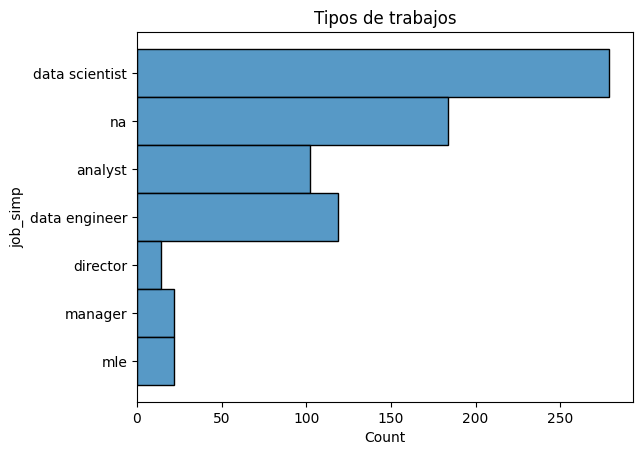

In [29]:
sns.histplot(data=df, y='job_simp').set_title('Tipos de trabajos')

De lo cual notamos una alta demanda en el área del DataScience, analistas, e ingenieros de datos.

La primera pregunta que debiese surgir del análisis de éste histograma es ¿Qué ocurre con el trabajo con etiqueta *na*? ¿Acaso no es predominante también? La respuesta a estas preguntas es: el dataset, en su columna job_simp, escribe una simplificación de los títulos de los trabajos, sin embargo, algunos como "Research Scientist" o "Scientist I/II, Biology" o "Scientist" o "Spectral Scientist/Engineer", o "Analytics Consultant", entran en esta categoría. Por lo que podríamos señalar que "en general" corresponde a un área de la investigación pero sería del todo correcto.

Es por ello, que decidimos no considerarla en la predominancia, pues su estructura es ambigua. Veamos ahora, los salarios por región geografica:

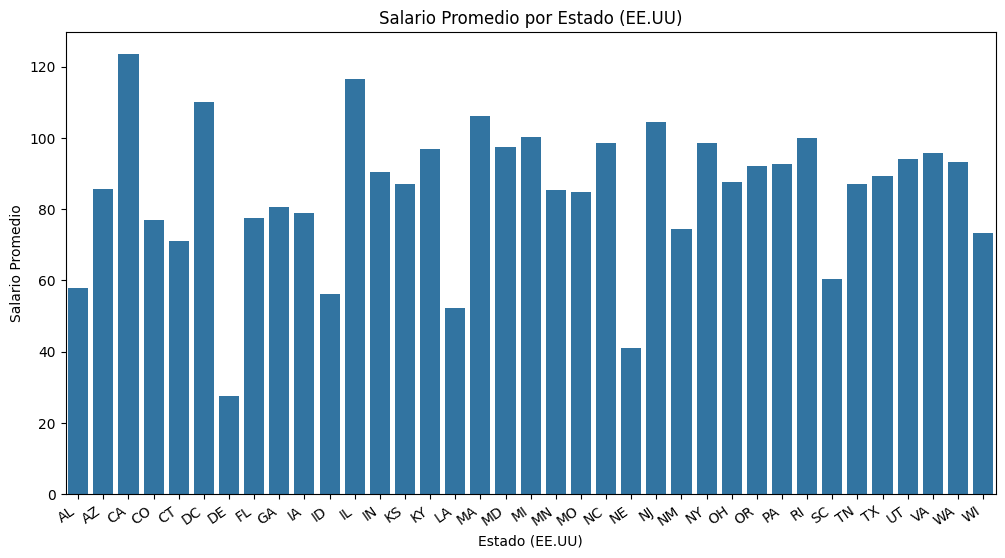

In [30]:
import matplotlib.pyplot as plt

df_job_salary = df.groupby('job_state')['avg_salary'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='job_state', y='avg_salary', data=df_job_salary)
plt.title('Salario Promedio por Estado (EE.UU)')
plt.xlabel('Estado (EE.UU)')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=35, ha='right')
plt.show()

Notamos claramente una baja paga -en relación a los demás estados- en Denver (DE) y Nebraska (NE). Lo cual se pueda deber a:


1.   Baja industria asociada a la tecnología
2.   Alta presencia de industria agricultora, ganadera, entre otras.

Pues, esto podría significar que son trabajos escazos y de ocasión (por ejemplo), y de allí su baja remuneración.



Ahora bien, observemos las relaciones entre **solamente** las variables numéricas:

In [31]:
X_num = df[vars_num]

<Axes: >

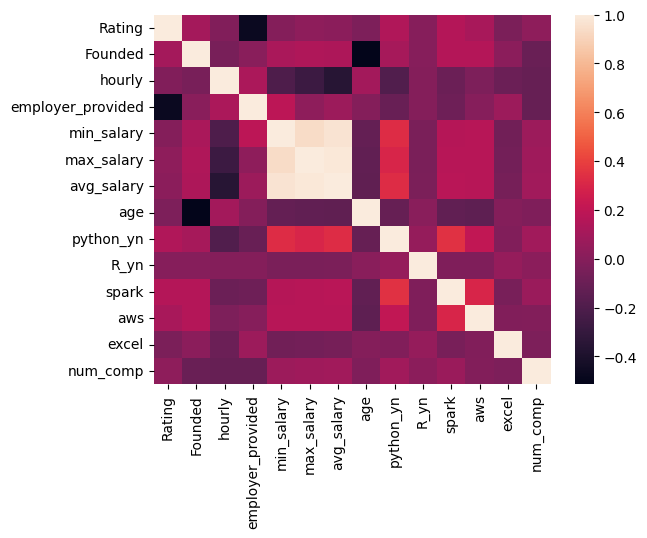

In [32]:
import seaborn as sns

sns.heatmap(X_num.corr())

Como nuestra variable apredecir es 'avg_salary', es claro que la dependencia con las variables 'max_salary' y 'min_salary' va a ser alta, pues podría predecirse como el promedio de la suma de ambas variables.

Resulta interesante la presencia de la variable 'python_yn' (conocimiento sobre python) para el salario promedio, lo cual tiene sentido, pues Data Scientist era uno de los trabajos más demandados. La otra relación directa es la cantidad de horas trabajadas 'hourly', pues también presenta alta correlación con el salario promedio.

Sin embargo, comenzaremos sólamente a intentar predecir los salarios con algunas variables interesantes:

## Modelado y evaluación (supervisada)

Antes de comenzar con el desarrollo de nuestras predicciones, debemos mencionar algunos puntos. En orden de aparición en nuestro trabajo, utilizamos los siguientes modelos y por las siguientes razones:

*   **Linear Regressor**: es el modelo estándar a la hora de predecir datos. Puesto que lo mejor que podría suceder es que las variables a predecir, se comporten de manera lineal con las variables de entrada.
*   **Ridge Regressor**: pues, del análisis de la matriz de correlación, observamos que existen algunas variables con correlación no menor a la que deseamos estimar; en estos casos, Ridge Regressor en conveniente de utilizar.
*   **KNN**: primero: nuestro dataset es relativamente pequeño; segundo: al momento de utilizarlo, tendremos más columnas con las que entrenar el modelo (esto se explicará en las siguientes líneas) , lo cual podría ser beneficioso para nuestras predicciones.
*   **Random Forest Regressor**: es menos sensible a outliers, y puede capturar no-linealidad de nuestro dataset.
*   **GBR**: suele disminuir los valores de MSE y es hyper-regulable.
*   **XGB**: es una versión "más parametrizable y más eficiente" que GBR.

El procedimiento a continuación va a ser buscar predecir ['avg_salary'] mediante una fracción del dataset original. Luego, en base a los resultados, agregaremos mayores columnas (i.e., información a los modelos); del mismo modo, dependiendo de cada situación, comenzaremos con LinearRegressor y RidgeRegressor, para luego, una vez tengamos más datos, implementar los demás modelos. Finalmente, entrenaremos los modelos con todas las variables numéricas y estudiaremos el desempeño de sus predicciones.




### Predicción 1: prediciendo [avg_salary] con [python_yn, R_yn, spark, aws ,excel,max_salary]

Utilizaremos un train_test_split para tomar nuestro "sampleo" de los datos, y entrenaremos el modelo de Linear regression, observaremos sus errores (con diferentes métricas) y luego, analizaremos los resultados.

Para ello, importamos lo siguiente:

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#importamos aquí las métricas a utilizar
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [34]:
X = df[['python_yn','R_yn','spark','aws','excel','max_salary']]
y = df['avg_salary']

Entonces, lo que realizaremos será construir y entrenar el modelo, sin escalar nuestras variables, pues cada columna X llega a ser binaria. En efecto:

In [35]:
X.describe()

,python_yn,R_yn,spark,aws,excel,max_salary
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,0.528302,0.002695,0.225067,0.237197,0.522911,128.149596
std,0.499535,0.051882,0.417908,0.425651,0.499812,45.220324
min,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,124.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,155.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,306.000000


Así, construiremos primero:

In [36]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [37]:
lin_reg = Pipeline([
    ('lin_reg', LinearRegression())
])

In [38]:
lin_reg.fit(X_tr, y_tr)

Pipeline(steps=[('lin_reg', LinearRegression())])

In [39]:
pred_lin_reg = lin_reg.predict(X_te)

Veamos algunas métricas:

In [40]:
mse_lr_pred1 = mse(y_te, pred_lin_reg)
r2_lr_pred1 = r2_score(y_te, pred_lin_reg)
mae_lr_pred1 = mae(y_te, pred_lin_reg)

print('mse',mse_lr_pred1)
print('R^2',r2_lr_pred1)
print('mae',mae_lr_pred1)

mse 32.69905792136482
R^2 0.9799945952908663
mae 3.653833732493629


#### Ridge Regression

In [41]:
ridge_reg = Pipeline([
    ('ridge_reg', Ridge(alpha=1.0, fit_intercept=True, random_state=42))
])

ridge_reg.fit(X_tr, y_tr)
pred_ridge_reg = ridge_reg.predict(X_te)

In [42]:
mse_ridg_pred1 = mse(y_te, pred_ridge_reg)
r2_ridg_pred1 = r2_score(y_te, pred_ridge_reg)
mae_ridg_pred1 = mae(y_te, pred_ridge_reg)

print('mse',mse_ridg_pred1)
print('R^2',r2_ridg_pred1)
print('mae',mae_ridg_pred1)


mse 32.70388087436331
R^2 0.9799916445903643
mae 3.6558640805253426


Por lo que los errores no varían demasiado respecto del modelo anterior.

### Predicción 2: prediciendo [avg_salary] con [age, python_yn, R_yn, spark, aws, excel, max_salary]

Definimos ahora:

In [43]:
X2 = df[['age','python_yn','R_yn','spark','aws','excel','max_salary']]

Ahora, podemos entrenar los mismos modelos de antes:

In [44]:
X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y, test_size=0.2, random_state=42)

#### Linear Regression y Ridge

In [45]:
lin_reg.fit(X2_tr, y2_tr)
ridge_reg.fit(X2_tr, y2_tr)

pred_lin_reg2 = lin_reg.predict(X2_te)
pred_ridge_reg2 = ridge_reg.predict(X2_te)

mse_lr_pred2 = mse(y2_te, pred_lin_reg2)
r2_lr_pred2 = r2_score(y2_te, pred_lin_reg2)
mae_lr_pred2 = mae(y2_te, pred_lin_reg2)

mse_ridg_pred2 = mse(y2_te, pred_ridge_reg2)
r2_ridg_pred2 = r2_score(y2_te, pred_ridge_reg2)
mae_ridg_pred2 = mae(y2_te, pred_ridge_reg2)

print('mse lr',mse_lr_pred2)
print('mse rid', mse_ridg_pred2)

print('R^2 lr',r2_lr_pred2)
print('R^2 rid',r2_ridg_pred2)

print('mae lin',mae_lr_pred2)
print('mae rid',mae_ridg_pred2)

mse lr 32.82338284376994
mse rid 32.829396679156744
R^2 lr 0.9799185328430084
R^2 rid 0.9799148535562517
mae lin 3.678229583614462
mae rid 3.6807692999581243


De este modo, nuestros resultados no seran muy distintos a los que obtuvimos anteriormente. Esto era de esperar, sin embargo, al estudiar la matriz de correlaciones, pues 'age' y 'avg_salary' no tenían demasiada correlación. Veamos qué sucede al agregar las variables 'hourly' y 'rating' a nuestros modelos:

### Predicción 3: prediciendo [avg_salary] con [hourly, rating,age, python_yn, R_yn, spark, aws, excel, max_salary]

Definimos esta vez:

In [46]:
X3 = df[['hourly','Rating','age','python_yn','R_yn','spark','aws','excel','max_salary']]

Pero al introducir nuevas variables que ya no son binarias, consideramos pertinente escalarlas:

In [47]:
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

In [48]:
X3_tr, X3_te, y3_tr, y3_te = train_test_split(X3_scaled, y, test_size=0.2, random_state=42)

#### Linear Regression y Ridge

In [49]:
lin_reg.fit(X3_tr, y3_tr)
ridge_reg.fit(X3_tr, y3_tr)

pred_lin_reg3 = lin_reg.predict(X3_te)
pred_ridge_reg3 = ridge_reg.predict(X3_te)

mse_lr_pred3 = mse(y3_te, pred_lin_reg3)
mse_ridg_pred3 = mse(y3_te, pred_ridge_reg3)
mae_lr_pred3 = mae(y3_te, pred_lin_reg3)


r2_lr_pred3 = r2_score(y3_te, pred_lin_reg3)
r2_ridg_pred3 = r2_score(y3_te, pred_ridge_reg3)


mae_lr_pred3 = mae(y3_te, pred_lin_reg3)
mae_ridg_pred3 = mae(y3_te, pred_ridge_reg3)


print('mse_lr_pred3', mse(y3_te, pred_lin_reg3))
print('mse_ridg_pred3', mse(y3_te, pred_ridge_reg3))

print('r2_lr_pred3', r2_score(y3_te, pred_lin_reg3))
print('r2_ridg_pred3', r2_score(y3_te, pred_ridge_reg3))

print('mae_lr_pred3', mae_lr_pred3)
print('mae_ridg_pred3', mae_ridg_pred3)

mse_lr_pred3 26.271590256733216
mse_ridg_pred3 26.158699124586484
r2_lr_pred3 0.9839269438066874
r2_ridg_pred3 0.98399601101933
mae_lr_pred3 3.459508866215923
mae_ridg_pred3 3.4552548626575126


Notamos una pequeña variación en los errores, pero el que destaca es que el valor de R^2 aumentó levemente en comparación al caso anterior.

#### KNeigborsRegressor

Veamos cómo se comporta éste modelo bajo las condiciones del último X3

In [50]:
from sklearn.neighbors import KNeighborsRegressor

Construimos el modelo y lo entrenamos:

In [51]:
knn = Pipeline([
    ('knn', KNeighborsRegressor(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto',
        leaf_size=30,
        p=2,
        metric='minkowski'
    ))
])

In [52]:
knn.fit(X3_tr, y_tr)

Pipeline(steps=[('knn', KNeighborsRegressor())])

In [53]:
pred_knn = knn.predict(X3_te)

In [54]:
mse_knn_pred3 = mse(y_te, pred_knn)

r2_knn_pred3 = r2_score(y_te, pred_knn)

mae_knn_pred3 = mae(y_te, pred_knn)

In [55]:
print('mse_knn_pred3', mse(y_te, pred_knn))
print('r2_knn_pred3', r2_knn_pred3)
print('mae_knn_pred3', mae_knn_pred3)

mse_knn_pred3 161.45308724832216
r2_knn_pred3 0.9012224034188036
mae_knn_pred3 8.589932885906041


Notamos una clara disminución en el valor del mse respecto de los casos anteriores con Rigde y LinearRegression; al mismo tiempo, el valor de R^2 aumenta considerablemente, lo que significa una mejoría en las predicciones al incluir más variables en el modelo.

#### Random Forest regressor

Probemos a predecir el salario utilizando el Random Forest Regressor:

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
random_forest = Pipeline([
    ('random_forest', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        ))
])

Entrenamos ahora nuestro modelo y hacemos la predicción:

In [58]:
random_forest.fit(X3_tr, y_tr)

Pipeline(steps=[('random_forest',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       random_state=42))])

In [59]:
pred_random_forest = random_forest.predict(X3_te)

In [60]:
mse_randf_pred3 = mse(y_te, pred_random_forest)
r2_randf_pred3 = r2_score(y_te, pred_random_forest)
mae_randf_pred3 = mae(y_te, pred_random_forest)

In [61]:
print('mse_randf_pred3', mse(y_te, pred_random_forest))
print('r2_randf_pred3', r2_randf_pred3)
print('mae_randf_pred3', mae_randf_pred3)

mse_randf_pred3 30.948292434551504
r2_randf_pred3 0.9810657200981532
mae_randf_pred3 2.8134168322550117


De modo que notamos resultados similares a los del modelo de KNeighborsRegressor.

#### Gradient Boosting Regressor

Probemos ahora con el siguiente modelo:

In [62]:
from sklearn.metrics import r2_score

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = Pipeline([
    ("gbr", GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gbr.fit(X3_tr,y_tr)
pred_gbr = gbr.predict(X3_te)

mse_gbr_pred3 = mse(y_te, pred_gbr)
r2_gbr_pred3 = r2_score(y_te, pred_gbr)
mae_gbr_pred3 = mae(y_te, pred_gbr)

print("MSE:", mse_gbr_pred3)
print("r2_score:", r2_gbr_pred3)
print("mae_score:", mae_gbr_pred3)

MSE: 24.11953425516138
r2_score: 0.9852435796367378
mae_score: 3.157718621908382


Notamos que, en este caso, obtenemos resultados aún más prometedores. Pues el MSE resulta menor que todos los anteriores. Se resume entonces hasta ahora los resultados que hemos obtenido:

### Resultados a priori

Veremos dos gráficas que resuman los resultados de cada métrica, para cada predicción y modelo hasta ahora:

In [64]:
resultadosMSE = pd.DataFrame({
    'Modelo': ['linear_reg', 'ridge','knn','random_for','gbr'],
    'pred1' : [ mse_lr_pred1, mse_ridg_pred1,0,0,0],
    'pred2' : [ mse_lr_pred2, mse_ridg_pred2,0,0,0],
    'pred3' : [ mse_lr_pred3,mse_lr_pred3,mse_lr_pred3, mse_ridg_pred3, mse_gbr_pred3],
                          })
resultadosMSE

,Modelo,pred1,pred2,pred3
0,linear_reg,32.699058,32.823383,26.271590
1,ridge,32.703881,32.829397,26.271590
2,knn,0.000000,0.000000,26.271590
3,random_for,0.000000,0.000000,26.158699
4,gbr,0.000000,0.000000,24.119534


In [65]:
resultadosR2 = pd.DataFrame({
    'Modelo': ['linear_reg', 'ridge','knn','random_for','gbr'],
    'pred1' : [ r2_lr_pred1, r2_ridg_pred1,0,0,0],
    'pred2' : [ r2_lr_pred2, r2_ridg_pred2,0,0,0],
    'pred3' : [ r2_lr_pred3,r2_ridg_pred3,r2_lr_pred3, r2_ridg_pred3, r2_gbr_pred3],
                          })
resultadosR2

,Modelo,pred1,pred2,pred3
0,linear_reg,0.979995,0.979919,0.983927
1,ridge,0.979992,0.979915,0.983996
2,knn,0.000000,0.000000,0.983927
3,random_for,0.000000,0.000000,0.983996
4,gbr,0.000000,0.000000,0.985244


In [69]:
resultadosMAE = pd.DataFrame({
    'Modelo': ['linear_reg', 'ridge','knn','random_for','gbr'],
    'pred1' : [ mae_lr_pred1, mae_ridg_pred1,0,0,0],
    'pred2' : [ mae_lr_pred2, mae_ridg_pred2,0,0,0],
    'pred3' : [ mae_lr_pred3,mae_ridg_pred3,mae_lr_pred3, mae_ridg_pred3, mae_gbr_pred3],
                          })
resultadosMAE

,Modelo,pred1,pred2,pred3
0,linear_reg,3.653834,3.678230,3.459509
1,ridge,3.655864,3.680769,3.455255
2,knn,0.000000,0.000000,3.459509
3,random_for,0.000000,0.000000,3.455255
4,gbr,0.000000,0.000000,3.157719


In [66]:
# prompt: Mediante el marco de datos resultados: grafica los datos

import altair as alt
# Melt the dataframe to long format for easier plotting
resultados_melted = resultadosMSE.melt(id_vars='Modelo', var_name='predicción', value_name='Value')

chart = alt.Chart(resultados_melted).mark_bar().encode(
    # Set the x-axis to the Model column
    x='Modelo:N',
    # Set the y-axis to the Value column
    y='Value:Q',
    # Color the bars based on the Prediction column
    color='predicción:N',
    # Use the Prediction column to create separate columns for each prediction
    column=alt.Column('predicción:N', header=alt.Header(titleOrient="bottom", labelOrient="bottom"))
).properties(
    title='MSE de Predicciones por Modelo'
)

chart

alt.Chart(...)

In [67]:
# Melt the dataframe to long format for easier plotting
resultados_melted2 = resultadosR2.melt(id_vars='Modelo', var_name='predicción', value_name='Value')

chart2 = alt.Chart(resultados_melted2).mark_bar().encode(
    # Set the x-axis to the Model column
    x='Modelo:N',
    # Set the y-axis to the Value column
    y='Value:Q',
    # Color the bars based on the Prediction column
    color='predicción:N',
    # Use the Prediction column to create separate columns for each prediction
    column=alt.Column('predicción:N', header=alt.Header(titleOrient="bottom", labelOrient="bottom"))
).properties(
    title='R^2 de Predicciones por Modelo'
)

chart2

alt.Chart(...)

In [70]:
resultados_melted3 = resultadosMAE.melt(id_vars='Modelo', var_name='predicción', value_name='Value')

chart3 = alt.Chart(resultados_melted3).mark_bar().encode(
    # Set the x-axis to the Model column
    x='Modelo:N',
    # Set the y-axis to the Value column
    y='Value:Q',
    # Color the bars based on the Prediction column
    color='predicción:N',
    # Use the Prediction column to create separate columns for each prediction
    column=alt.Column('predicción:N', header=alt.Header(titleOrient="bottom", labelOrient="bottom"))
).properties(
    title='MAE de Predicciones por Modelo'
)

chart3

alt.Chart(...)

Notamos una tendencia a la baja en los errores, a medida que aumentamos las cantidades de variables numéricas (por ejemplo, de la predicción 2 a 3). En este contexto, el modelo que resultados más prometedores entrega es el de GradienteBoostingRegressor (GBR). Del mismo moodo, notamos una tendencia al aumento de los valores de R^2 para el GBR y para los valores de MAE.



Ahora bien, dados estos resultados, haremos lo siguiente: **Entrenaremos los modelos: KNeigborsRegressor, RandomForestRegressor y GBR para predecir el [avg_salary] a través de todas las variables numéricas que posee nuestro dataset** (a excepción de la variable a predecir, claramente).


### Predicción 4: prediciendo [avg_salary] con todas las variables numéricas

Lo primero es obtener las variables numéricas del dataset (lo cual realizamos al comienzo)

In [71]:
vars_num

Index(['Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'num_comp'],
      dtype='object')

Claramente, la variable 'employer_provided' no entrega información útil, sin embargo, no la eliminaremos, a diferencia de la variable 'avg_salary'- pues al ser relativamente pocas columnas, no debiese haber diferencia en las predicciones (de no entregar información).

Así, escalamos nuestros datos y entrenamos los modelos:

In [72]:
X4_num = df[vars_num].drop(columns = ['avg_salary'])
X4 = scaler.fit_transform(X4_num)

In [73]:
X4_tr, X4_te, y4_tr, y4_te = train_test_split(X3_scaled, y, test_size=0.2, random_state=42)

#### Linear Regressor

In [74]:
lin_reg.fit(X4_tr, y4_tr)

Pipeline(steps=[('lin_reg', LinearRegression())])

#### Ridge

In [75]:
ridge_reg.fit(X4_tr, y4_tr)

Pipeline(steps=[('ridge_reg', Ridge(random_state=42))])

#### KNN

In [76]:
knn.fit(X4_tr, y4_tr)

Pipeline(steps=[('knn', KNeighborsRegressor())])

#### RandomForest

In [77]:
random_forest.fit(X4_tr, y4_tr)

Pipeline(steps=[('random_forest',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       random_state=42))])

#### GBR

In [78]:
gbr.fit(X4_tr, y4_tr)

Pipeline(steps=[('gbr',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           random_state=42))])

Esta vez, incorporamos además, el XGBRegressor

In [79]:
from xgboost import XGBRegressor

#### XGBRegressor

In [80]:
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [81]:
xgb.fit(X4_tr, y4_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [82]:
lr_pred4 = lin_reg.predict(X4_te)
ridge_pred4 = ridge_reg.predict(X4_te)
knn_pred4 = knn.predict(X4_te)
random_forest_pred4 = random_forest.predict(X4_te)
gbr_pred4 = gbr.predict(X4_te)
xgb_pred4 = xgb.predict(X4_te)

Calculemos los errores:

In [83]:
mse_lr_pred4 = mse(y4_te, lr_pred4)
mse_ridg_pred4 = mse(y4_te, ridge_pred4)
mse_knn_pred4 = mse(y4_te, knn_pred4)
mse_randf_pred4 = mse(y4_te, random_forest_pred4)
mse_gbr_pred4 = mse(y4_te, gbr_pred4)
mse_xgb_pred4 = mse(y4_te, xgb_pred4)

r2_lr_pred4 = r2_score(y4_te, lr_pred4)
r2_ridg_pred4 = r2_score(y4_te, ridge_pred4)
r2_knn_pred4 = r2_score(y4_te, knn_pred4)
r2_randf_pred4 = r2_score(y4_te, random_forest_pred4)
r2_gbr_pred4 = r2_score(y4_te, gbr_pred4)
r2_xgb_pred4 = r2_score(y4_te, xgb_pred4)

mae_lr_pred4 = mae(y4_te, lr_pred4)
mae_ridg_pred4 = mae(y4_te, ridge_pred4)
mae_knn_pred4 = mae(y4_te, knn_pred4)
mae_randf_pred4 = mae(y4_te, random_forest_pred4)
mae_gbr_pred4 = mae(y4_te, gbr_pred4)
mae_xgb_pred4 = mae(y4_te, xgb_pred4)

In [84]:
resultados_pred4 = pd.DataFrame({
    'Modelo': ['lr','ridge','knn', 'random_for','gbr','xgb'],
    'mse' : [mse_lr_pred4 ,mse_ridg_pred4, mse_knn_pred4, mse_randf_pred4, mse_gbr_pred4,mse_xgb_pred4],
    'r2' : [ r2_lr_pred4, r2_ridg_pred4, r2_knn_pred4, r2_randf_pred4, r2_gbr_pred4,r2_xgb_pred4],
    'mae' : [ mae_lr_pred4, mae_ridg_pred4,mae_knn_pred4, mae_randf_pred4, mae_gbr_pred4,mae_xgb_pred4]
})

In [85]:
resultados_pred4

,Modelo,mse,r2,mae
0,lr,26.271590,0.983927,3.459509
1,ridge,26.158699,0.983996,3.455255
2,knn,161.453087,0.901222,8.589933
3,random_for,30.948292,0.981066,2.813417
4,gbr,24.119534,0.985244,3.157719
5,xgb,17.934679,0.989027,2.349821


In [86]:
# prompt: Mediante el marco de datos resultados_pred4: barras, haz los dos gráficos uno al lado del otro

import altair as alt
chart_mse = alt.Chart(resultados_pred4).mark_bar().encode(x='Modelo', y='mse')
chart_r2 = alt.Chart(resultados_pred4).mark_bar().encode(x='Modelo', y='r2')
chart_mae = alt.Chart(resultados_pred4).mark_bar().encode(x='Modelo', y='mae')
chart_combined = alt.hconcat(chart_mse, chart_r2,chart_mae)
chart_combined

alt.HConcatChart(...)

En este contexto, los modelos que mejores resultados entregan, a lo largo de nuestro estudio son:


1.   GradientBoostRegressor
2.   LinearRegressor
3.   Random Forest
4.   Ridge
5.   XGBoost Regressor

Sorpresivamente, el KNN, en esta útlima predicción posee un error bastante elevado en consideración a los otros modelos utilizados. Esto se puede deber a un sobre ajuste del modelo, dados los hiperparámetros, por lo que sería buena aplicar un GridSearch, para obtener hiperparámetros óptimos.

Veamos gráficamente cómo se comportan las predicciones que hemos realizado:



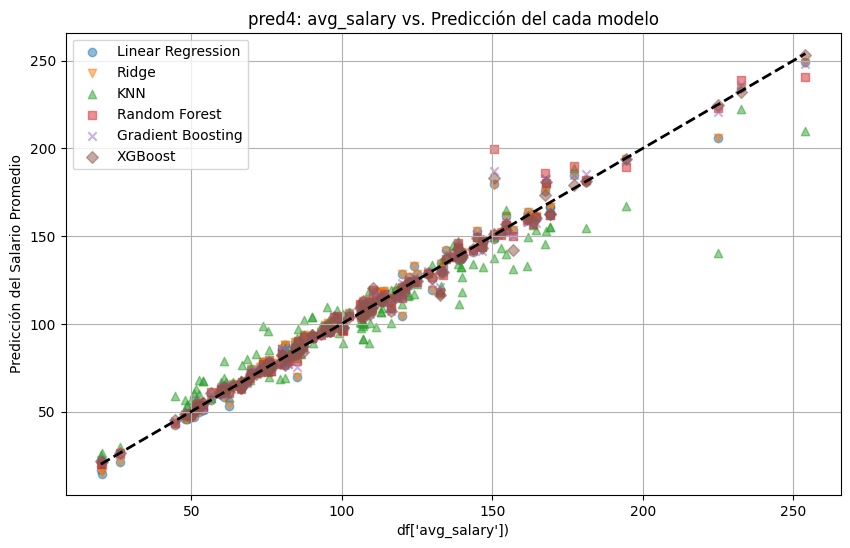

In [90]:
plt.figure(figsize=(10, 6))

#con esto agregamos cada predicción
plt.scatter(y4_te, lr_pred4, alpha=0.5, marker='o')
plt.scatter(y4_te, ridge_pred4, alpha=0.5, marker='v')
plt.scatter(y4_te, knn_pred4, alpha=0.5, marker='^')
plt.scatter(y4_te, random_forest_pred4, alpha=0.5, marker='s')
plt.scatter(y4_te, gbr_pred4, alpha=0.5, marker='x')
plt.scatter(y4_te, xgb_pred4, alpha=0.5, marker='D')


plt.plot([y4_te.min(), y4_te.max()], [y4_te.min(), y4_te.max()], 'k--', lw=2)
plt.xlabel('df[\'avg_salary\'])')
plt.ylabel('Predicción del Salario Promedio')
plt.title('pred4: avg_salary vs. Predicción del cada modelo')

#con esto agregamos las etiquetas para cada datitoo
plt.legend(['Linear Regression', 'Ridge', 'KNN', 'Random Forest', 'Gradient Boosting', 'XGBoost'])


plt.grid(True)
plt.show()

### Modelo Pytorch

Ahora implementaremos el modelo pytorch de redes neuronales, de manera similar a los modelos anteriores, tomando en cuenta distintas variables, haciendo foco en las variables que tienen más relación con el salario como min o max salary.

In [91]:
Xpy = X_num

In [92]:
Xpy

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,num_comp
0,3.8,1973,0,0,53,91,72.0,47,1,0,0,0,1,0
1,3.4,1984,0,0,63,112,87.5,36,1,0,0,0,0,0
2,4.8,2010,0,0,80,90,85.0,24,1,0,1,0,1,0
3,3.8,1965,0,0,56,97,76.5,55,1,0,0,0,0,3
4,2.9,1998,0,0,86,143,114.5,22,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,1988,0,0,58,111,84.5,24,0,0,0,1,0,3
738,4.4,2006,0,0,72,133,102.5,24,1,0,1,1,0,3
739,2.6,1984,0,0,56,91,73.5,36,0,0,0,0,1,0
740,3.2,1988,0,0,95,160,127.5,24,0,0,0,0,1,0


In [93]:
ypy = Xpy['avg_salary'].values

#### Con todas las variables numéricas

In [94]:
Xpy1 = Xpy.drop('avg_salary',axis=1)  #Quitamos la variable a predecir

In [95]:
ypy1 = ypy  #Tomamos la variable a predecir

In [96]:
from sklearn.preprocessing import StandardScaler
#Estandarizamos los datos
scaler = StandardScaler()
Xpy1_scaled = scaler.fit_transform(Xpy1)

In [97]:
from sklearn.model_selection import train_test_split
#Separamos en test y train
X_train, X_test, y_train, y_test = train_test_split(Xpy1_scaled, ypy1, test_size=0.2)

In [98]:
import torch  #Importamos Pytorch
from torch.utils.data import TensorDataset, DataLoader  #Importamos para pasar a tensores

#Convertirmos a tensores
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

#Creamos dataLoader para batches
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [99]:
import torch.nn as nn #Importamos nn para red neuronal
import torch.nn.functional as F #Importamos funciones
#Definimos la arquitectura de la red
class RedNeuronal(nn.Module):
    def __init__(self, input_size):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  #Capa oculta 1
        self.fc2 = nn.Linear(64, 32)  #Capa oculta 2
        self.fc3 = nn.Linear(32, 1) #Salida

    def forward(self, x):
        x = F.relu(self.fc1(x)) #Pasa la primera capa
        x = F.relu(self.fc2(x)) #Pasa segunda capa
        x = self.fc3(x) #Sin activación
        return x

#Inicia el modelo
modelo = RedNeuronal(input_size=X_train.shape[1])

In [100]:
from torch.utils.data import random_split

tam_total = len(train_data)
tam_val = int(0.2 * tam_total)  #Tomamos el 20% para validación
tam_train = tam_total - tam_val

train_dataset, val_dataset = random_split(train_data, [tam_train, tam_val])


In [101]:
#Definimos entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [102]:
criterio = nn.MSELoss() #Definimos criterio de MSE para mejora
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001) #Usamos lr=0.001 para priorizar mejor modelo antes que velocidad

loss_por_epoca = [] #Definimos vectores para loss y val
val_loss_por_epoca = []

num_epochs = 200  #Fijamos cantidad de epocas en 200
for epoch in range(num_epochs): #Comienza a iterar la red neuronal
    loss_acumulado = 0.0  #Iniciamos el vector de perdida
    modelo.train()
    for batch_x, batch_y in train_loader:
        optimizador.zero_grad()
        outputs = modelo(batch_x)
        loss = criterio(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizador.step()
        loss_acumulado += loss.item()

    loss_media = loss_acumulado / len(train_loader) #Perdida media entre epocas
    loss_por_epoca.append(loss_media) #Agregamos la perdida al vector

  #Modelo de validación

    modelo.eval()
    val_loss = 0.0  #Iniciamos vector de validación
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_outputs = modelo(val_x)
            v_loss = criterio(val_outputs, val_y.unsqueeze(1))
            val_loss += v_loss.item()
    val_loss_media = val_loss / len(val_loader) #Validación media entre epocas
    val_loss_por_epoca.append(val_loss_media)

    #Imprimimos resultados por epoca
    print(f'Época {epoch+1}, Pérdida entrenamiento: {loss_media:.4f}, Pérdida validación: {val_loss_media:.4f}')



Época 1, Pérdida entrenamiento: 11630.3904, Pérdida validación: 11801.6907
Época 2, Pérdida entrenamiento: 11490.3025, Pérdida validación: 11637.0364
Época 3, Pérdida entrenamiento: 11318.2943, Pérdida validación: 11381.9895
Época 4, Pérdida entrenamiento: 11002.8106, Pérdida validación: 10991.5986
Época 5, Pérdida entrenamiento: 10557.7317, Pérdida validación: 10424.3456
Época 6, Pérdida entrenamiento: 9894.6988, Pérdida validación: 9626.6981
Época 7, Pérdida entrenamiento: 9020.0118, Pérdida validación: 8589.4144
Época 8, Pérdida entrenamiento: 7900.2176, Pérdida validación: 7303.5364
Época 9, Pérdida entrenamiento: 6558.0346, Pérdida validación: 5844.3563
Época 10, Pérdida entrenamiento: 5073.7142, Pérdida validación: 4337.4761
Época 11, Pérdida entrenamiento: 3614.1091, Pérdida validación: 2937.4538
Época 12, Pérdida entrenamiento: 2352.5242, Pérdida validación: 1789.1167
Época 13, Pérdida entrenamiento: 1387.9914, Pérdida validación: 1028.4325
Época 14, Pérdida entrenamiento: 787.

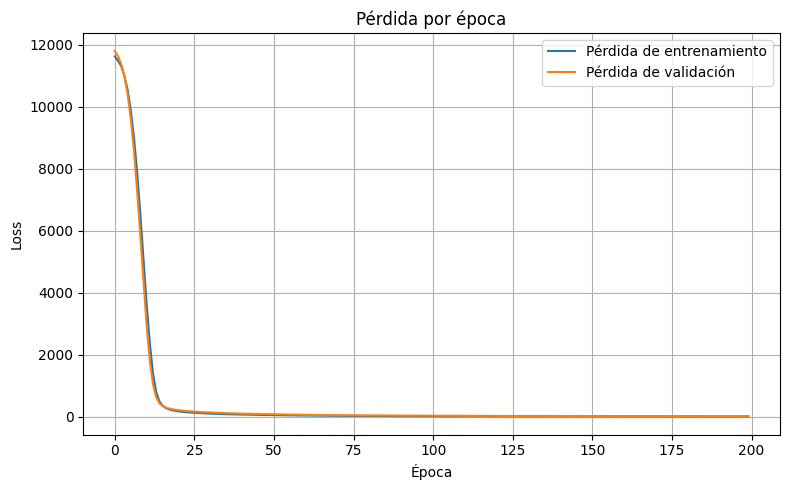

In [103]:
import matplotlib.pyplot as plt
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(loss_por_epoca, label='Pérdida de entrenamiento')
plt.plot(val_loss_por_epoca, label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Pérdida por época')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_pred = modelo(X_test_tensor).numpy()
    mae1 = mean_absolute_error(y_test, y_pred)  #Calculamos el mae
    print(f'MAE: {mae1:.2f}')

    mse1 = mean_squared_error(y_test, y_pred) #Calculamos el MSE
    print(f"MSE: {mse1:.4f}")

MAE: 1.37
MSE: 4.3578


In [105]:
torch.save(modelo.state_dict(), 'modelo_glassdoor.pth') #Guarda el modelo

#### Quitamos variables no relevantes

In [106]:
Xpy2 = Xpy.drop(['avg_salary','employer_provided'],axis=1)

In [107]:
Xpy2

,Rating,Founded,hourly,min_salary,max_salary,age,python_yn,R_yn,spark,aws,excel,num_comp
0,3.8,1973,0,53,91,47,1,0,0,0,1,0
1,3.4,1984,0,63,112,36,1,0,0,0,0,0
2,4.8,2010,0,80,90,24,1,0,1,0,1,0
3,3.8,1965,0,56,97,55,1,0,0,0,0,3
4,2.9,1998,0,86,143,22,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,1988,0,58,111,24,0,0,0,1,0,3
738,4.4,2006,0,72,133,24,1,0,1,1,0,3
739,2.6,1984,0,56,91,36,0,0,0,0,1,0
740,3.2,1988,0,95,160,24,0,0,0,0,1,0


In [108]:
ypy2 = ypy

In [109]:
Xpy2_scaled = scaler.fit_transform(Xpy2)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpy2_scaled, ypy2, test_size=0.2)

In [111]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convertir a tensores
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Crear DataLoader para batches
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [112]:
import torch.nn as nn
import torch.nn.functional as F

class RedNeuronal(nn.Module):
    def __init__(self, input_size):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Capa oculta 1
        self.fc2 = nn.Linear(64, 32)          # Capa oculta 2
        self.fc3 = nn.Linear(32, 1)           # Capa de salida (1 neurona para regresión)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Sin activación para regresión
        return x

#Iniciamos el modelo
modelo = RedNeuronal(input_size=X_train.shape[1])

In [113]:
from torch.utils.data import random_split

tam_total = len(train_data)
tam_val = int(0.2 * tam_total)  #Tomamos el 20% para validación
tam_train = tam_total - tam_val

train_dataset, val_dataset = random_split(train_data, [tam_train, tam_val])

In [114]:
#Definimos entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [115]:
criterio = nn.MSELoss() #Definimos criterio de MSE para mejora
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001) #Usamos lr=0.001 para priorizar mejor modelo antes que velocidad

loss_por_epoca = [] #Definimos vectores para loss y val
val_loss_por_epoca = []

num_epochs = 200  #Fijamos cantidad de epocas en 200
for epoch in range(num_epochs): #Comienza a iterar la red neuronal
    loss_acumulado = 0.0  #Iniciamos el vector de perdida
    modelo.train()
    for batch_x, batch_y in train_loader:
        optimizador.zero_grad()
        outputs = modelo(batch_x)
        loss = criterio(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizador.step()
        loss_acumulado += loss.item()

    loss_media = loss_acumulado / len(train_loader) #Perdida media entre epocas
    loss_por_epoca.append(loss_media) #Agregamos la perdida al vector

  #Modelo de validación

    modelo.eval()
    val_loss = 0.0  #Iniciamos vector de validación
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_outputs = modelo(val_x)
            v_loss = criterio(val_outputs, val_y.unsqueeze(1))
            val_loss += v_loss.item()
    val_loss_media = val_loss / len(val_loader) #Validación media entre epocas
    val_loss_por_epoca.append(val_loss_media)

    #Imprimimos resultados por epoca
    print(f'Época {epoch+1}, Pérdida entrenamiento: {loss_media:.4f}, Pérdida validación: {val_loss_media:.4f}')



Época 1, Pérdida entrenamiento: 11880.9053, Pérdida validación: 11224.4326
Época 2, Pérdida entrenamiento: 11781.6760, Pérdida validación: 11114.5581
Época 3, Pérdida entrenamiento: 11614.5545, Pérdida validación: 10932.6101
Época 4, Pérdida entrenamiento: 11386.0296, Pérdida validación: 10641.9380
Época 5, Pérdida entrenamiento: 11031.7155, Pérdida validación: 10199.2034
Época 6, Pérdida entrenamiento: 10445.5647, Pérdida validación: 9558.2458
Época 7, Pérdida entrenamiento: 9662.7953, Pérdida validación: 8672.1765
Época 8, Pérdida entrenamiento: 8622.0677, Pérdida validación: 7535.6832
Época 9, Pérdida entrenamiento: 7307.4427, Pérdida validación: 6217.0782
Época 10, Pérdida entrenamiento: 5851.3379, Pérdida validación: 4747.4417
Época 11, Pérdida entrenamiento: 4301.6836, Pérdida validación: 3315.2844
Época 12, Pérdida entrenamiento: 2870.2299, Pérdida validación: 2100.4980
Época 13, Pérdida entrenamiento: 1748.1649, Pérdida validación: 1240.2984
Época 14, Pérdida entrenamiento: 990

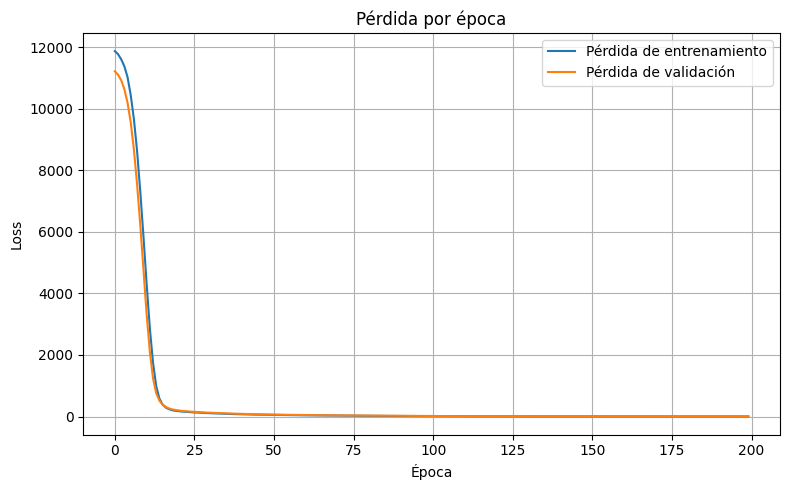

In [116]:
import matplotlib.pyplot as plt
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(loss_por_epoca, label='Pérdida de entrenamiento')
plt.plot(val_loss_por_epoca, label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Pérdida por época')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_pred = modelo(X_test_tensor).numpy()
    mae2 = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae2:.2f}')

    mse2 = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse2:.4f}")

MAE: 1.39
MSE: 7.4458


#### Sin min_salary

In [118]:
Xpy3 = Xpy.drop(['avg_salary','employer_provided','min_salary'],axis=1)

In [119]:
Xpy3

,Rating,Founded,hourly,max_salary,age,python_yn,R_yn,spark,aws,excel,num_comp
0,3.8,1973,0,91,47,1,0,0,0,1,0
1,3.4,1984,0,112,36,1,0,0,0,0,0
2,4.8,2010,0,90,24,1,0,1,0,1,0
3,3.8,1965,0,97,55,1,0,0,0,0,3
4,2.9,1998,0,143,22,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,1988,0,111,24,0,0,0,1,0,3
738,4.4,2006,0,133,24,1,0,1,1,0,3
739,2.6,1984,0,91,36,0,0,0,0,1,0
740,3.2,1988,0,160,24,0,0,0,0,1,0


In [120]:
ypy3 = ypy

In [121]:
Xpy3_scaled = scaler.fit_transform(Xpy3)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpy3_scaled, ypy3, test_size=0.2)

In [123]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convertir a tensores
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Crear DataLoader para batches
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [124]:
import torch.nn as nn
import torch.nn.functional as F

class RedNeuronal(nn.Module):
    def __init__(self, input_size):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Capa oculta 1
        self.fc2 = nn.Linear(64, 32)          # Capa oculta 2
        self.fc3 = nn.Linear(32, 1)           # Capa de salida (1 neurona para regresión)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Sin activación para regresión
        return x

# Inicializar modelo
modelo = RedNeuronal(input_size=X_train.shape[1])

In [125]:
from torch.utils.data import random_split

tam_total = len(train_data)
tam_val = int(0.2 * tam_total)  #Tomamos el 20% para validación
tam_train = tam_total - tam_val

train_dataset, val_dataset = random_split(train_data, [tam_train, tam_val])


In [126]:
#Definimos entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [127]:
criterio = nn.MSELoss() #Definimos criterio de MSE para mejora
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001) #Usamos lr=0.001 para priorizar mejor modelo antes que velocidad

loss_por_epoca = [] #Definimos vectores para loss y val
val_loss_por_epoca = []

num_epochs = 200  #Fijamos cantidad de epocas en 200
for epoch in range(num_epochs): #Comienza a iterar la red neuronal
    loss_acumulado = 0.0  #Iniciamos el vector de perdida
    modelo.train()
    for batch_x, batch_y in train_loader:
        optimizador.zero_grad()
        outputs = modelo(batch_x)
        loss = criterio(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizador.step()
        loss_acumulado += loss.item()

    loss_media = loss_acumulado / len(train_loader) #Perdida media entre epocas
    loss_por_epoca.append(loss_media) #Agregamos la perdida al vector

  #Modelo de validación

    modelo.eval()
    val_loss = 0.0  #Iniciamos vector de validación
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_outputs = modelo(val_x)
            v_loss = criterio(val_outputs, val_y.unsqueeze(1))
            val_loss += v_loss.item()
    val_loss_media = val_loss / len(val_loader) #Validación media entre epocas
    val_loss_por_epoca.append(val_loss_media)

    #Imprimimos resultados por epoca
    print(f'Época {epoch+1}, Pérdida entrenamiento: {loss_media:.4f}, Pérdida validación: {val_loss_media:.4f}')



Época 1, Pérdida entrenamiento: 11810.9471, Pérdida validación: 10591.5544
Época 2, Pérdida entrenamiento: 11757.9922, Pérdida validación: 10511.1182
Época 3, Pérdida entrenamiento: 11630.6240, Pérdida validación: 10377.1799
Época 4, Pérdida entrenamiento: 11461.2495, Pérdida validación: 10160.3005
Época 5, Pérdida entrenamiento: 11164.3217, Pérdida validación: 9830.9636
Época 6, Pérdida entrenamiento: 10763.9661, Pérdida validación: 9361.0466
Época 7, Pérdida entrenamiento: 10178.0361, Pérdida validación: 8723.6782
Época 8, Pérdida entrenamiento: 9351.5275, Pérdida validación: 7904.7208
Época 9, Pérdida entrenamiento: 8337.7948, Pérdida validación: 6918.0382
Época 10, Pérdida entrenamiento: 7158.2474, Pérdida validación: 5788.8738
Época 11, Pérdida entrenamiento: 5845.6360, Pérdida validación: 4603.3232
Época 12, Pérdida entrenamiento: 4518.9877, Pérdida validación: 3421.9381
Época 13, Pérdida entrenamiento: 3250.1892, Pérdida validación: 2375.3126
Época 14, Pérdida entrenamiento: 218

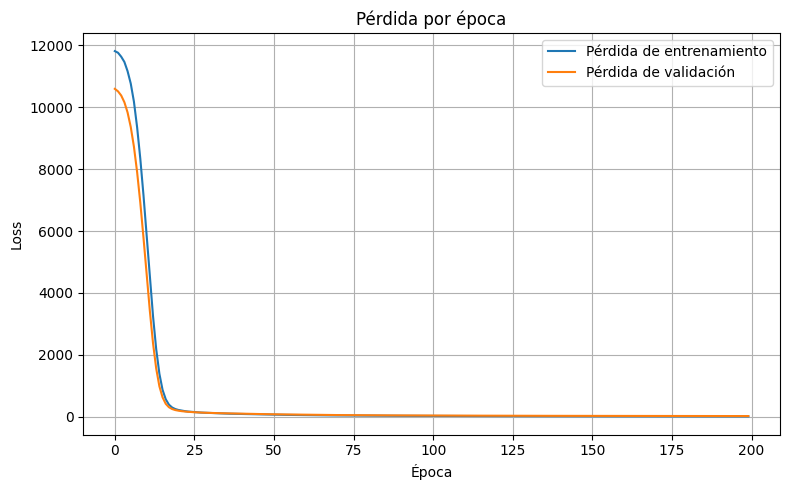

In [128]:
import matplotlib.pyplot as plt
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(loss_por_epoca, label='Pérdida de entrenamiento')
plt.plot(val_loss_por_epoca, label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Pérdida por época')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_pred = modelo(X_test_tensor).numpy()
    mae3 = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae3:.2f}')

    mse3 = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse3:.4f}")

MAE: 3.80
MSE: 35.0821


#### Sin max_salay

In [130]:
Xpy4 = Xpy.drop(['avg_salary','employer_provided','max_salary'],axis=1)

In [131]:
Xpy4

,Rating,Founded,hourly,min_salary,age,python_yn,R_yn,spark,aws,excel,num_comp
0,3.8,1973,0,53,47,1,0,0,0,1,0
1,3.4,1984,0,63,36,1,0,0,0,0,0
2,4.8,2010,0,80,24,1,0,1,0,1,0
3,3.8,1965,0,56,55,1,0,0,0,0,3
4,2.9,1998,0,86,22,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,1988,0,58,24,0,0,0,1,0,3
738,4.4,2006,0,72,24,1,0,1,1,0,3
739,2.6,1984,0,56,36,0,0,0,0,1,0
740,3.2,1988,0,95,24,0,0,0,0,1,0


In [132]:
ypy4 = ypy

In [133]:
Xpy4_scaled = scaler.fit_transform(Xpy4)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpy4_scaled, ypy4, test_size=0.2)

In [135]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convertir a tensores
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Crear DataLoader para batches
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [136]:
import torch.nn as nn
import torch.nn.functional as F

class RedNeuronal(nn.Module):
    def __init__(self, input_size):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Capa oculta 1
        self.fc2 = nn.Linear(64, 32)          # Capa oculta 2
        self.fc3 = nn.Linear(32, 1)           # Capa de salida (1 neurona para regresión)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Sin activación para regresión
        return x

# Inicializar modelo
modelo = RedNeuronal(input_size=X_train.shape[1])

In [137]:
from torch.utils.data import random_split

tam_total = len(train_data)
tam_val = int(0.2 * tam_total)  #Tomamos el 20% para validación
tam_train = tam_total - tam_val

train_dataset, val_dataset = random_split(train_data, [tam_train, tam_val])


In [138]:
#Definimos entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [139]:
criterio = nn.MSELoss() #Definimos criterio de MSE para mejora
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001) #Usamos lr=0.001 para priorizar mejor modelo antes que velocidad

loss_por_epoca = [] #Definimos vectores para loss y val
val_loss_por_epoca = []

num_epochs = 200  #Fijamos cantidad de epocas en 200
for epoch in range(num_epochs): #Comienza a iterar la red neuronal
    loss_acumulado = 0.0  #Iniciamos el vector de perdida
    modelo.train()
    for batch_x, batch_y in train_loader:
        optimizador.zero_grad()
        outputs = modelo(batch_x)
        loss = criterio(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizador.step()
        loss_acumulado += loss.item()

    loss_media = loss_acumulado / len(train_loader) #Perdida media entre epocas
    loss_por_epoca.append(loss_media) #Agregamos la perdida al vector

  #Modelo de validación

    modelo.eval()
    val_loss = 0.0  #Iniciamos vector de validación
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_outputs = modelo(val_x)
            v_loss = criterio(val_outputs, val_y.unsqueeze(1))
            val_loss += v_loss.item()
    val_loss_media = val_loss / len(val_loader) #Validación media entre epocas
    val_loss_por_epoca.append(val_loss_media)

    #Imprimimos resultados por epoca
    print(f'Época {epoch+1}, Pérdida entrenamiento: {loss_media:.4f}, Pérdida validación: {val_loss_media:.4f}')



Época 1, Pérdida entrenamiento: 11469.7630, Pérdida validación: 12262.4172
Época 2, Pérdida entrenamiento: 11402.4736, Pérdida validación: 12125.1565
Época 3, Pérdida entrenamiento: 11260.0020, Pérdida validación: 11913.4517
Época 4, Pérdida entrenamiento: 10950.6504, Pérdida validación: 11591.0168
Época 5, Pérdida entrenamiento: 10581.4533, Pérdida validación: 11116.6011
Época 6, Pérdida entrenamiento: 10040.0184, Pérdida validación: 10449.6570
Época 7, Pérdida entrenamiento: 9293.2193, Pérdida validación: 9554.0237
Época 8, Pérdida entrenamiento: 8313.5123, Pérdida validación: 8436.9625
Época 9, Pérdida entrenamiento: 7137.7229, Pérdida validación: 7118.5564
Época 10, Pérdida entrenamiento: 5805.0073, Pérdida validación: 5666.7614
Época 11, Pérdida entrenamiento: 4389.4757, Pérdida validación: 4213.7209
Época 12, Pérdida entrenamiento: 3089.8697, Pérdida validación: 2905.2774
Época 13, Pérdida entrenamiento: 1976.4580, Pérdida validación: 1873.2227
Época 14, Pérdida entrenamiento: 12

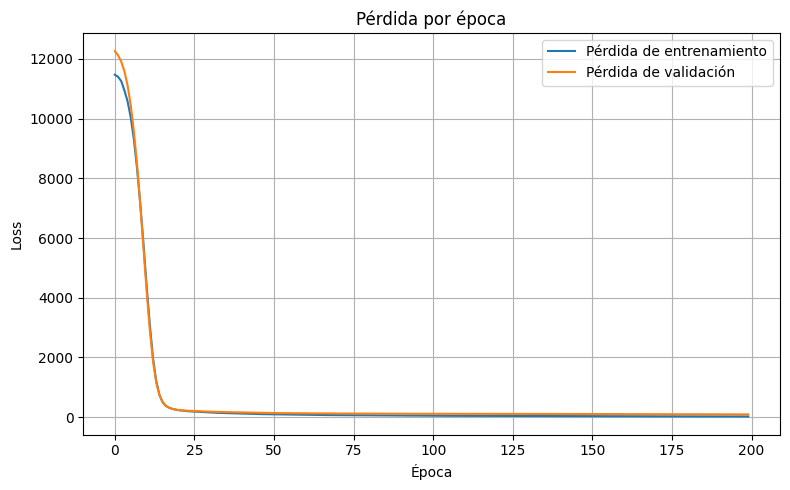

In [140]:
import matplotlib.pyplot as plt
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(loss_por_epoca, label='Pérdida de entrenamiento')
plt.plot(val_loss_por_epoca, label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Pérdida por época')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_pred = modelo(X_test_tensor).numpy()
    mae4 = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae4:.2f}')

    mse4 = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse4:.4f}")

MAE: 5.50
MSE: 62.4459


#### Sin min_salary ni max_salary


In [142]:
Xpy5 = Xpy.drop(['avg_salary','employer_provided','min_salary','max_salary'],axis=1)

In [143]:
Xpy5

,Rating,Founded,hourly,age,python_yn,R_yn,spark,aws,excel,num_comp
0,3.8,1973,0,47,1,0,0,0,1,0
1,3.4,1984,0,36,1,0,0,0,0,0
2,4.8,2010,0,24,1,0,1,0,1,0
3,3.8,1965,0,55,1,0,0,0,0,3
4,2.9,1998,0,22,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
737,3.9,1988,0,24,0,0,0,1,0,3
738,4.4,2006,0,24,1,0,1,1,0,3
739,2.6,1984,0,36,0,0,0,0,1,0
740,3.2,1988,0,24,0,0,0,0,1,0


In [144]:
ypy5 = ypy

In [145]:
Xpy5_scaled = scaler.fit_transform(Xpy5)

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpy5_scaled, ypy5, test_size=0.2)

In [147]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convertir a tensores
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Crear DataLoader para batches
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [148]:
import torch.nn as nn
import torch.nn.functional as F

class RedNeuronal(nn.Module):
    def __init__(self, input_size):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Capa oculta 1
        self.fc2 = nn.Linear(64, 32)          # Capa oculta 2
        self.fc3 = nn.Linear(32, 1)           # Capa de salida (1 neurona para regresión)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Sin activación para regresión
        return x

# Inicializar modelo
modelo = RedNeuronal(input_size=X_train.shape[1])

In [149]:
from torch.utils.data import random_split

tam_total = len(train_data)
tam_val = int(0.2 * tam_total)  #Tomamos el 20% para validación
tam_train = tam_total - tam_val

train_dataset, val_dataset = random_split(train_data, [tam_train, tam_val])


In [150]:
#Definimos entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [151]:
criterio = nn.MSELoss() #Definimos criterio de MSE para mejora
optimizador = torch.optim.Adam(modelo.parameters(), lr=0.001) #Usamos lr=0.001 para priorizar mejor modelo antes que velocidad

loss_por_epoca = [] #Definimos vectores para loss y val
val_loss_por_epoca = []

num_epochs = 200  #Fijamos cantidad de epocas en 200
for epoch in range(num_epochs): #Comienza a iterar la red neuronal
    loss_acumulado = 0.0  #Iniciamos el vector de perdida
    modelo.train()
    for batch_x, batch_y in train_loader:
        optimizador.zero_grad()
        outputs = modelo(batch_x)
        loss = criterio(outputs, batch_y.unsqueeze(1))
        loss.backward()
        optimizador.step()
        loss_acumulado += loss.item()

    loss_media = loss_acumulado / len(train_loader) #Perdida media entre epocas
    loss_por_epoca.append(loss_media) #Agregamos la perdida al vector

  #Modelo de validación

    modelo.eval()
    val_loss = 0.0  #Iniciamos vector de validación
    with torch.no_grad():
        for val_x, val_y in val_loader:
            val_outputs = modelo(val_x)
            v_loss = criterio(val_outputs, val_y.unsqueeze(1))
            val_loss += v_loss.item()
    val_loss_media = val_loss / len(val_loader) #Validación media entre epocas
    val_loss_por_epoca.append(val_loss_media)

    #Imprimimos resultados por epoca
    print(f'Época {epoch+1}, Pérdida entrenamiento: {loss_media:.4f}, Pérdida validación: {val_loss_media:.4f}')



Época 1, Pérdida entrenamiento: 11360.0547, Pérdida validación: 11863.2332
Época 2, Pérdida entrenamiento: 11285.7665, Pérdida validación: 11781.3967
Época 3, Pérdida entrenamiento: 11197.6693, Pérdida validación: 11651.8535
Época 4, Pérdida entrenamiento: 11024.8281, Pérdida validación: 11444.5366
Época 5, Pérdida entrenamiento: 10767.5760, Pérdida validación: 11134.6091
Época 6, Pérdida entrenamiento: 10394.1086, Pérdida validación: 10695.1836
Época 7, Pérdida entrenamiento: 9848.8902, Pérdida validación: 10101.5818
Época 8, Pérdida entrenamiento: 9152.8484, Pérdida validación: 9338.8293
Época 9, Pérdida entrenamiento: 8287.5926, Pérdida validación: 8436.4552
Época 10, Pérdida entrenamiento: 7261.3495, Pérdida validación: 7396.7433
Época 11, Pérdida entrenamiento: 6150.1153, Pérdida validación: 6285.8615
Época 12, Pérdida entrenamiento: 5009.2507, Pérdida validación: 5191.7662
Época 13, Pérdida entrenamiento: 3906.6151, Pérdida validación: 4186.1431
Época 14, Pérdida entrenamiento: 3

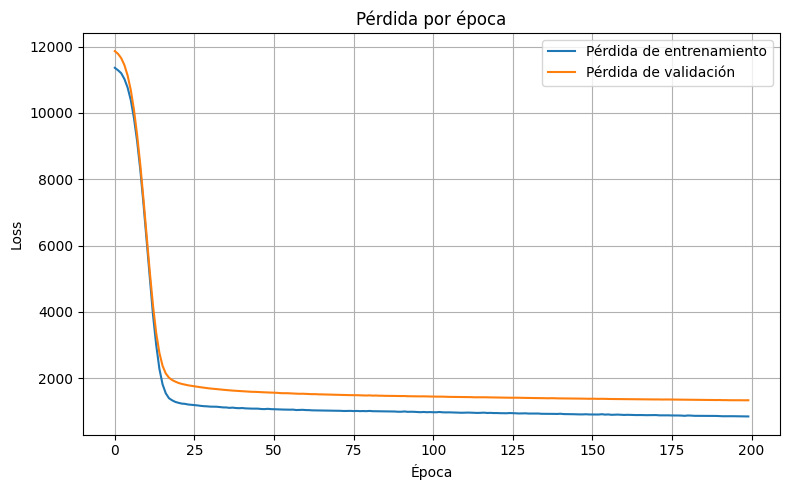

In [152]:
import matplotlib.pyplot as plt
#Graficamos
plt.figure(figsize=(8, 5))
plt.plot(loss_por_epoca, label='Pérdida de entrenamiento')
plt.plot(val_loss_por_epoca, label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Pérdida por época')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_pred = modelo(X_test_tensor).numpy()
    mae5 = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae5:.2f}')

    mse5 = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse5:.4f}")

MAE: 24.79
MSE: 1000.2565


#### Resultados Pytorch

In [154]:
#Hacemos una matriz de los errores de cada modelo
resultadosMSE = pd.DataFrame({
    'Errores': ['MSE', 'MAE'],
    'Con todo' : [ mse1, mae1],
    'Sin variables no-relevantes' : [ mse2, mae2],
    'Sin min' : [ mse3, mae3],
    'Sin max' : [ mse4, mae4],
    'Sin min y max' : [ mse5, mae5]
                          })
resultadosMSE

,Errores,Con todo,Sin variables no-relevantes,Sin min,Sin max,Sin min y max
0,MSE,4.357776,7.445790,35.082066,62.445866,1000.256517
1,MAE,1.365492,1.389315,3.800468,5.496704,24.792384


In [155]:
#Separamos MSE y MAE
Errorespy_plot = resultadosMSE.set_index('Errores').T


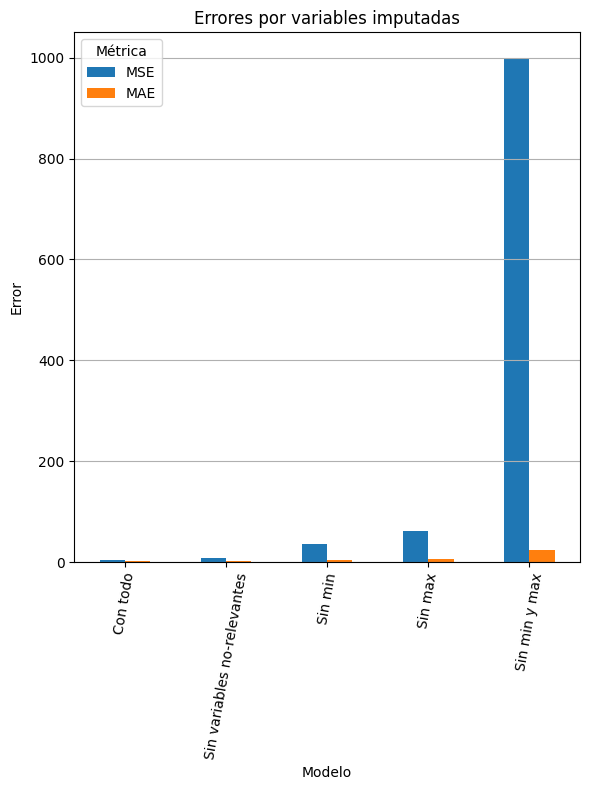

In [158]:
import matplotlib.pyplot as plt

#Graficamos en barras
Errorespy_plot.plot(kind='bar', figsize=(6, 8))

plt.title('Errores por variables imputadas')
plt.ylabel('Error')
plt.xlabel('Modelo')
plt.xticks(rotation=80)
plt.grid(axis='y')
plt.legend(title='Métrica')
plt.tight_layout()
plt.show()


## Conclusiones

  *   **Respecto a las predicciones 1,2,3 y 4**: claramente -y como era de esperar-, se observan resultados mejores (i.e., con una tendencia de disminuir en los errores, ya sea MSE y R^2) a la hora de introducir más variables en los modelos. Nos resulta interesante la notoria disminución al introducir la variable 'hourly', en la predicción 3, pues a diferencia de las anteriores, existe una mejoría notable en las predicciones.
  
  También resulta interesante el hecho de que en la tercera predicción, KNN, RandomForest y GBR presentan un desempeño similiar, por lo que en condiciones similares, cualquiera de los modelos mencionados sería una buena alternativa para predecir.

  En relación a la predicción 4, sorprendentemente el modelo de KNN posee errores MSE y MAE mayores en comparación a los demás utilizados. Sin embargo, esto no quiere decir que sea una mala predicción; análogamente, este resultado puede deberse a hiper-parámetros no eficientes para el caso trabajado (con todas las variables numéricas). Una posible solución a esto, podría ser implementar una búsqueda por GridSearch a los parámetros utilizados, a modo de optimizarlos para alguna de las métricas. Esto también podría ser útil para el modelo de Ridge.

  *  **Respecto al modelo de Pytorch**: también se obtienen resultados similares a los de los métodos anteriores: errores mucho más bajos a medida que predecimos el salario promedio con una mayor cantidad de variables. La situación interesante a plantear, no obstante, es el caso en el que se predice el 'avg_salary' sin información de los salarios (es decir, sin las variables 'min_salary' ni 'max_salary'), puesto que los errores aumentan considerablemente. Lo cual tiene sentido práctico: ¿cómo un modelo podría predecir -con exactitud- un salario, si no posee información al respecto de donde debiese "vivir" dicha variable?

  De igual manera, el modelo no se comporta mal bajo este contexto de "nula información sobre los salarios", y un error MSE de 1450 aproximadamente, no es del todo pésimo. En palabras sencillas, no está del todo alejado de la realidad, lo cual es llamativo para futuras predicciones.


> En conclusión, se llevó a cabo el objetivo inicial del presente trabajo con éxito, logrando muy buenas predicciones del salario promedio en el área de la tecnología. Una posible situación a investigar es si existe un modelo, y en consecuencia un set de hyper-parámetros, tales que se pueda predecir -con un bajo error- la variable 'avg_salary', **sólo** con las variables de conocimiento en lenguajes de programación: python, R, spark, aws, excel.